In [204]:
import numpy as np
import pandas as pd
import string as st
from nltk.corpus import stopwords 

In [205]:
spam = pd.read_csv("spam.csv")

In [206]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [207]:
spam.shape

(5572, 5)

In [208]:
#1. Date Cleaning
#2. EDA
#3. Text Preprocessing
#4. model building
#5. Evaluation
#6. Improvment
#7. website
#8. Deploy


Data Cleaning

In [209]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [210]:
#drop last 3 columns
spam.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [211]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [212]:
#renaming the columns 
spam.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [213]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [214]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [215]:
spam['target'] = encoder.fit_transform(spam['target'])

In [216]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [217]:
# missing values
spam.isnull().sum()

target    0
text      0
dtype: int64

In [218]:
#check for duplicate values
spam.duplicated().sum()

403

In [219]:
spam = spam.drop_duplicates(keep = 'first')

In [220]:
spam.duplicated().sum()

0

In [221]:
spam.shape

(5169, 2)

2.EDA(explodatory data analysis)

In [222]:
spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [223]:
spam['text'].value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later                  

([<matplotlib.patches.Wedge at 0x19c9cdf04f0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

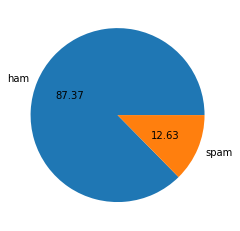

In [224]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(),labels = ['ham','spam'], autopct = '%0.2f')

In [225]:
import nltk

In [226]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\RAHUL KUMAR
[nltk_data]     BHAGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [227]:
#number of charecters
spam['num_charecter'] = spam['text'].apply(len)

C:\Users\RAHULK~1\AppData\Local\Temp/ipykernel_7056/1997024570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_charecter'] = spam['text'].apply(len)


In [228]:
spam.head()

,target,text,num_charecter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#numers of charecter

In [229]:
spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\RAHULK~1\AppData\Local\Temp/ipykernel_7056/545784398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [230]:
spam.head()

,target,text,num_charecter,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [231]:
spam['num_sentence'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\RAHULK~1\AppData\Local\Temp/ipykernel_7056/412039168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_sentence'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [232]:
spam.head()

,target,text,num_charecter,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [233]:
spam[['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455407,1.961308
std,58.236795,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [234]:
##spam
spam[spam['target'] == 1][['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [235]:
#ham
spam[spam['target'] == 0][['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123339,1.815545
std,56.358868,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='num_charecter', ylabel='Count'>

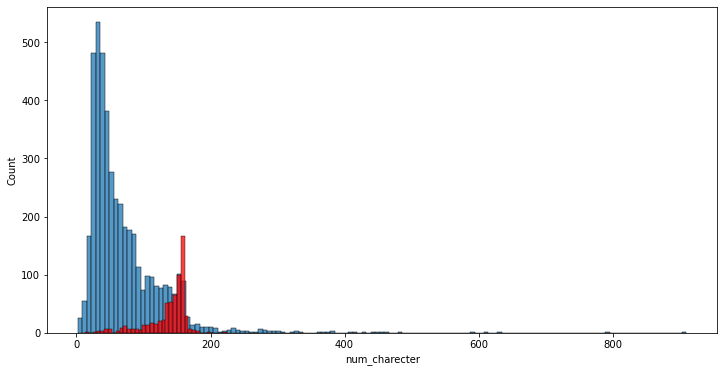

In [236]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(spam[spam['target'] == 0]['num_charecter'])
sns.histplot(spam[spam['target'] == 1]['num_charecter'], color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

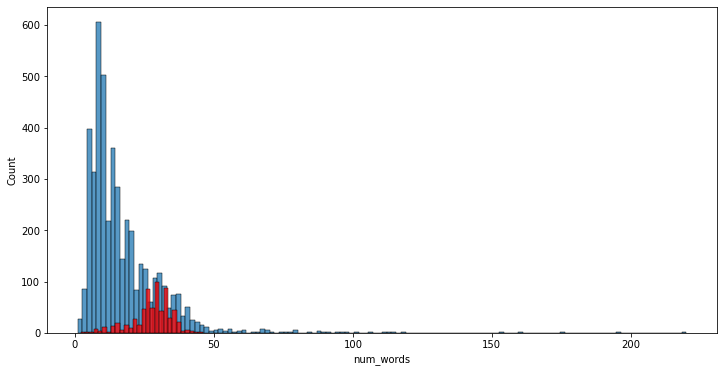

In [237]:
#plot graph as for words
plt.figure(figsize = (12,6))
sns.histplot(spam[spam['target'] == 0]['num_words'])
sns.histplot(spam[spam['target'] == 1]['num_words'], color = 'red')

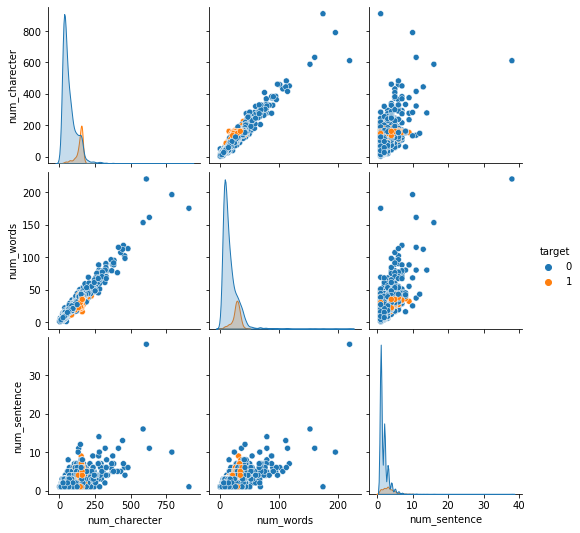

In [238]:
sns.pairplot(spam, hue = 'target')

<AxesSubplot:>

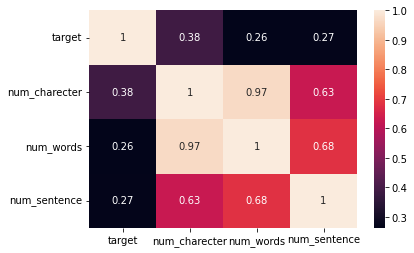

In [239]:
sns.heatmap(spam.corr(), annot = True)

In [240]:
#
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('singed')

'sing'

3.data Preprocessing
.lower case
.Tokenization
.removing speial chrecters
.removing stop words and punctuation
.stemming

In [241]:
def trasform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in  stopwords.words('english') and i not in st.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [242]:
trasform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [243]:
spam['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [244]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [245]:
import string as st
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [246]:
spam['trasform_text']=spam['text'].apply(trasform_text)

C:\Users\RAHULK~1\AppData\Local\Temp/ipykernel_7056/2652540244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['trasform_text']=spam['text'].apply(trasform_text)


In [247]:
spam.head()

,target,text,num_charecter,num_words,num_sentence,trasform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [248]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10, background_color='white')

In [249]:
#for spam messages
spam_wc = wc.generate(spam[spam['target'] ==1]['trasform_text'].str.cat(sep =" "))

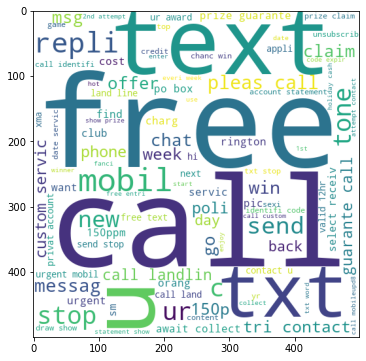

In [250]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [251]:
#for ham messages
ham_wc = wc.generate(spam[spam['target'] == 0]['trasform_text'].str.cat(sep =" "))

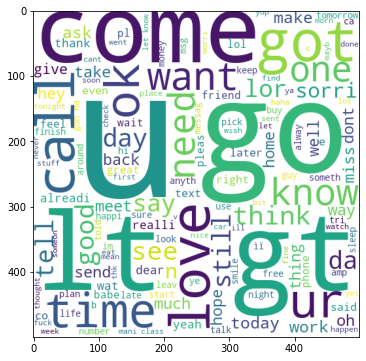

In [252]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [253]:
spam_corpus = []
for msg in spam[spam['target'] ==1]['trasform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [254]:
len(spam_corpus)

9939

c:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

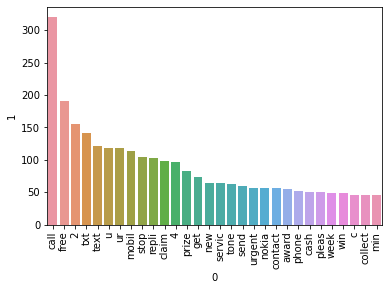

In [255]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [256]:
ham_corpus = []
for msg in spam[spam['target'] ==0]['trasform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [257]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

c:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'love'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

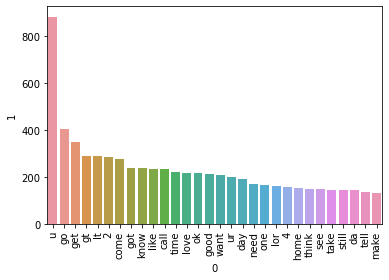

In [258]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

# #Model Building

## original code
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [259]:
## some changes apply here
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [260]:
X = tfidf.fit_transform(spam['trasform_text']).toarray()

In [261]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [262]:
X.shape

(5169, 3000)

In [263]:
Y = spam['target'].values

In [264]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [266]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)


In [267]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [268]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [269]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [285]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [271]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [272]:
#tfidf --> MNB

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [274]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver= 'liblinear',penalty = '11')
rfc = RandomForestClassifier(n_estimators=50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)


In [275]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    "NB" : mnb,
    "DT" : dtc,
    'RF' : rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'Xgb' : xgb
    
    
    
    }

In [276]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [277]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print('For',name)
    print('accuracy -',current_accuracy)
    print('precision -',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
accuracy - 0.9758220502901354
precision - 0.9747899159663865
For KN
accuracy - 0.9052224371373307
precision - 1.0
For NB
accuracy - 0.9709864603481625
precision - 1.0
For DT
accuracy - 0.9458413926499033
precision - 0.8014705882352942


ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
#imrove model
#1. change the max_feature parameter of tfidf

In [282]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [286]:
pickle.dump(mnb,open('model2.pkl','wb'))